# 1

<ipython-input-3-d8f9fc76929f>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(torch.arange(-6.0,1.0,0.0001),requires_grad = True)
  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-3-d8f9fc76929f>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p = torch.tensor(p + learning_rate*grad, requires_grad=True)
 15%|█▍        | 149/1000 [00:00<00:00, 4076.60it/s]


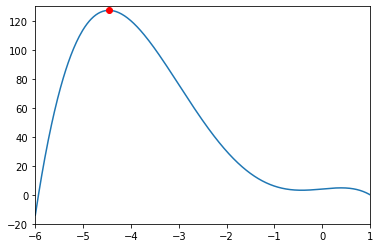

In [3]:
#Final Solution


import torch
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from tqdm  import tqdm

#creating the curve

fig, ax = plt.subplots()               
               
x = torch.tensor(torch.arange(-6.0,1.0,0.0001),requires_grad = True)
y_temp = 3*x - 6*x**3 - x**4 + 4

for i in range(0,x.size(0)):
    y = y_temp ## defining y tensor
    


#Point
learning_rate = 0.001
iterations = 1000
p=torch.tensor([-2.],requires_grad = True)
p_data = []
q_data = []

for i in tqdm(range(iterations)):
    q = 3*p - 6*p**3 - p**4 + 4
    q.backward()
    grad = p.grad
    if(grad<0):
        p = torch.tensor(p + learning_rate*grad, requires_grad=True)
        if(torch.abs(grad) <=0.01):
            break
    else:
        p = torch.tensor(p - learning_rate*grad, requires_grad=True)
        if(torch.abs(grad) <=0.01):
            break
            
    
    p_data.append(p)
    q_data.append(q)

#defining axis
ax = plt.axis([-6,1,-20,130])

#initial plotting of point and line
line, = plt.plot(x.detach().numpy(), y.detach().numpy())
redDot, = plt.plot([p_data[0].detach().numpy()], [q_data[0].detach().numpy()], 'ro')

#updating point
def animate(i):
    if(i<=len(p_data)):
         redDot.set_data(p_data[i].detach().numpy(), q_data[i].detach().numpy())
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, \
                                      interval=100, blit=True, repeat=True)

myAnimation.save('moving.mp4',  writer='ffmpeg') #Final Solution




# 2

In [ ]:
import torch
import math 
from tqdm  import tqdm
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numba import vectorize

x = np.linspace(start = -math.pi, stop = math.pi, num = 1000)
y = np.linspace(start = -math.pi, stop = math.pi, num = 1000)
X,Y = meshgrid(x, y) 
Z = np.cos(X)*np.sin(Y) 

In [23]:
learning_rate = 0.01
iterations = 1000
p=torch.tensor([3.],requires_grad = True)
q=torch.tensor([3.],requires_grad = True)
p_data = []
q_data = []
z_data = []

def update_gradient(grad,n):
    if(grad<0):
        n = torch.tensor(n + learning_rate*grad, requires_grad=True)
        return n
    else:
        n = torch.tensor(n - learning_rate*grad, requires_grad=True)
        return n

#Assigning derivative and their respective coordinates in p_data and q_data
for i in tqdm(range(iterations)):
        z = torch.cos(p)*torch.sin(q)
        
        z.backward()
        pgrad = p.grad
        qgrad = q.grad
        
        if torch.abs(pgrad)<= 0.01 and torch.abs(qgrad)<= 0.01 : 
            
                print(p,q,z)
                break
      
        
        p = update_gradient(pgrad,p)
        q = update_gradient(qgrad,q)
        p_data.append(p)
        q_data.append(q)   
        z_data.append(z)
     

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-23-2598e6f42ae2>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  n = torch.tensor(n + learning_rate*grad, requires_grad=True)
<ipython-input-23-2598e6f42ae2>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  n = torch.tensor(n - learning_rate*grad, requires_grad=True)
 85%|████████▌ | 852/1000 [00:00<00:00, 5076.62it/s]

tensor([0.0100], requires_grad=True) tensor([1.5722], requires_grad=True) tensor([0.9999], grad_fn=<MulBackward0>)


No handles with labels found to put in legend.


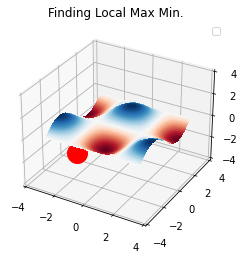

In [4]:
fig = plt.figure()
fig.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=None)
ax = fig.gca(projection='3d')


surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=2, cmap=cm.RdBu, antialiased=False)

redDot, = ax.plot([p_data[0]], [q_data[0]], [z_data[0]], 'ro',markersize=20)


ax.legend()
ax.set_xlim([-4.0, 4.0])
ax.set_ylim([-4.0, 4.0])
ax.set_zlim([-4.0, 4.0])


plt.title('Finding Local Max Min.')


def update_point(i):
       
        redDot.set_data([p_data[i].detach().numpy(), q_data[i].detach().numpy()])
        redDot.set_3d_properties(z_data[i].detach().numpy(), 'z')
        
        return redDot,


ani = animation.FuncAnimation(fig, update_point, frames = len(p_data), interval=100, blit=True, repeat=True)


ani.save('moving3D.mp4',  writer='ffmpeg')

plt.show()

